In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Set the style globally
# Alternatives include bmh, fivethirtyeight, ggplot,
# dark_background, seaborn-deep, etc
plt.style.use('seaborn-white')
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['figure.figsize'] = 8, 6

# 1. Introduction

This tutorial aims to give you an accessible introduction on how to use machine learning techniques for your projects and data sets.

We will use an open data set with data on the passengers aboard the infamous doomed sea voyage of 1912. By examining factors such as class, sex, and age, we will experiment with different machine learning algorithms and build a program that can predict whether a given passenger would have survived this disaster. For details you may consult this [link](https://blog.socialcops.com/engineering/machine-learning-python/).

## 1.2 Load dataset

In [2]:
data = pd.read_excel('data/titanic3.xls', 'titanic3', index_col=None, na_values=['NA'])

In [3]:
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


The column heading variables have the following meanings:

- survival: Survival (0 = no; 1 = yes)
- class: Passenger class (1 = first; 2 = second; 3 = third)
- name: Name
- sex: Sex
- age: Age
- sibsp: Number of siblings/spouses aboard
- parch: Number of parents/children aboard
- ticket: Ticket number
- fare: Passenger fare
- cabin: Cabin
- embarked: Port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
- boat: Lifeboat (if survived)
- body: Body number (if did not survive and body was recovered)


Our target variable is survived, let’s examine the overall chance of survival for a Titanic passenger.

In [4]:
data['survived'].mean()

0.3819709702062643

### 1.3 Check Survived distribution

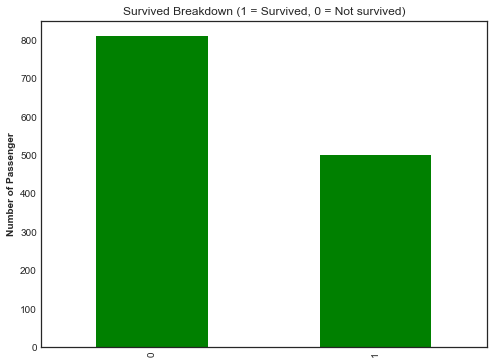

In [7]:
data.survived.value_counts().plot(kind='bar', color="g", alpha=1)
plt.title("Survived Breakdown (1 = Survived, 0 = Not survived)")
plt.ylabel("Number of Passenger");

## 2. Data Processing

In this stage we need to pre-process our data ready for machine learning algorithm. This involve things like:
- Handling missing values
- Feature representation

## 2.1 Handle missing value

In [8]:
data.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

Most of the columns are missing values for “boat”, “cabin”,'home.dest and  so we will remove these columns from the data frame. We will also drop other column like name and ticket. This is because the “name”, “ticket”, and “home.dest” columns consist of non-categorical string values. These are difficult to use in a classification algorithm, so we will drop them from the data set.

In [9]:
data.drop(['cabin','body','boat','name','ticket','home.dest'], axis=1, inplace=True)

To handle missing value in age, fare and embarked column  with median, 0 and NA:

In [10]:
data['age'].fillna(data['age'].median(), inplace=True)
data['fare'].fillna(0, inplace=True)
data['embarked'].fillna("NA", inplace=True)

Let us check again 

In [11]:
data.isnull().sum()

pclass      0
survived    0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

Now we need to format categorical(non-numeric) columns in a way that our machine learning algorithms will accept. We will use [preprocessing sklearn API](http://scikit-learn.org/stable/modules/preprocessing.html) which provides several common utility functions and transformer classes to change raw feature vectors into a representation that is more suitable for the downstream estimators.

In [12]:
#To check data type of each columns
data.dtypes

pclass        int64
survived      int64
sex          object
age         float64
sibsp         int64
parch         int64
fare        float64
embarked     object
dtype: object

The “sex” and “embarked” fields are both string values that correspond to categories (i.e “Male” and “Female”) so we will run each through a preprocessor. This preprocessor will convert these strings into integer keys, making it easier for the classification algorithms to find patterns. For instance, “Female” and “Male” will be converted to 0 and 1 respectively

In [13]:
from sklearn import preprocessing

In [14]:
def categorical_transform(data):
    le = preprocessing.LabelEncoder()
    data.sex = le.fit_transform(data.sex)
    data.embarked = le.fit_transform(data.embarked)
    return data

In [15]:
categorical_transform(data)

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,0,29.0000,0,0,211.3375,3
1,1,1,1,0.9167,1,2,151.5500,3
2,1,0,0,2.0000,1,2,151.5500,3
3,1,0,1,30.0000,1,2,151.5500,3
4,1,0,0,25.0000,1,2,151.5500,3
5,1,1,1,48.0000,0,0,26.5500,3
6,1,1,0,63.0000,1,0,77.9583,3
7,1,0,1,39.0000,0,0,0.0000,3
8,1,1,0,53.0000,2,0,51.4792,3
9,1,0,1,71.0000,0,0,49.5042,0


In [16]:
data.dtypes

pclass        int64
survived      int64
sex           int64
age         float64
sibsp         int64
parch         int64
fare        float64
embarked      int64
dtype: object

We finally have clean data which we should save and use it in next stage

In [17]:
data.to_csv('data/clean_titanic.csv')